# Project : Investigate a Dataset - TMDb Data

## Introduction

The aim of this project is to investigate the dataset provided by TMDb using the data analysis methods and applying statistical findings to get a more insight of trends and relations between various datapoints. 
Some of the facts about the data 
1. Dataset has more than 10k rows 
2. It contains both relevant columns and really less useful columns like homepage, tagline which can be wrangled to have most relevant information that can help to generate the reports. 
3. The release date of the movies also contains months, we can create a seperate column for the month


Some questions to explore 
1. Does the months have special reasons for releases? How many movies are released in each month in the given years. 
2. Movies that had decent ratings collected profit at the box office than low ratings.





In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import csv 
from datetime import datetime
import matplotlib.pyplot as plt


% matplotlib inline

Below are the properties of the dataset with some row information and column information. 

## Loads data 

In [49]:
#load the data to a dataframe to inspect
df = pd.read_csv('tmdb-movies.csv')

#Inspect the head to get an idea
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
#To have more insight on the data types and size of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Assumptions about the data : 

The budget and revenue fields are expressed in terms of dollars

Now we can see the column names that I felt, less useful is now removed from the data. And we have new set of the data with information what is relevant for our exploration. 

##  Clean the data if necessary and adapt the data. 

As the title says we need to clean the data only if necessary. So inorder to deduce our conclusions we first need to know whether our data has any issue or problems to be fixed. Let us start by analysing the problems. We can experiment the uniqueness of the table by using the method unique for the id column. and check the length of the data. 

In [51]:
#print the general size of the data set
print(df['id'].size)

#print and check if the unique value tallys. 
print(df['id'].unique().size)

10866
10865


From the data above we can deduce the first conclusion that the data has one row duplicated as the size of the unique column id is 10865 and the entire data set has 10866 rows. First we will remove the duplicate value from the tmdb_data.

In [52]:
#Drop the unnecessary duplicates from the data frame. 
df.drop_duplicates(inplace=True)

#Now check the size again to affirm
df['id'].size

10865

The above cleaning helped to remove the duplicate values. We will check further on the data and explore how the data looks from the bottom as we already saw how head looks, this might give us some insights. 

In [53]:
#Since we are curious about the entire data, it is good idea to inspect the bottom of the dataset. 
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


We can observe that the dataset with budget being 0 and revenue is also 0 from some datapoints, when we explore from bottom. These data can be counted as more frequent, so it is better to remove it from the dataset. 

In [54]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

# Data Wrangling

Data wrangling is the process of converting the data to format of our needs. 

- Step 1 : Remove all the unecessary columns from the dataframe and create fresh new data. 
- Step 2 : Convert the release date and add another column Month.
- Step 3 : Think about the interesting questions to investigate and update the introduction. (This is continous step and will not be briefed.)

## Step 1 : Remove all the unecessary columns from the dataframe and create fresh new data.

In [55]:
#We will keep only the relevant information for our questions. 
tmdb_data = df.drop(['overview' , 'cast' , 'homepage' , 'tagline'], axis = 1)

#Collect the ids of the column buget and revenue. 
change_coltype = ['budget', 'revenue']

#change the data type to int 
tmdb_data[change_coltype] = tmdb_data[change_coltype].applymap(np.int64)

#shwoing the datatypes of all columns
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Step 2 : Convert the release date and add another column Month.

In [56]:
#Our prime idea is to check whether the Month has some relevance with the releases.
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'], dayfirst= False , yearfirst=False, errors='coerce')

#We convert the date to month and create a new column in the dataset. 
tmdb_data['month'] =pd.to_datetime(tmdb_data['release_date']).dt.month

#Let's have a look over the information to see the newly generated column.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
director                3853 non-null object
keywords                3716 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
month                   3854 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(6)
memory usage: 572.

## Does the months have special reasons for releases? How many movies are released in each month.

In [57]:
def get_count_of(column_name):
    """
    This method will give the counts of the column name, created for reusability.
    The method is straightforward, gets the column name and returns the count of the data
    in the tmdb_data.
    """
    all_data = tmdb_data[column_name]
    
    count = all_data.value_counts()
    
    return count

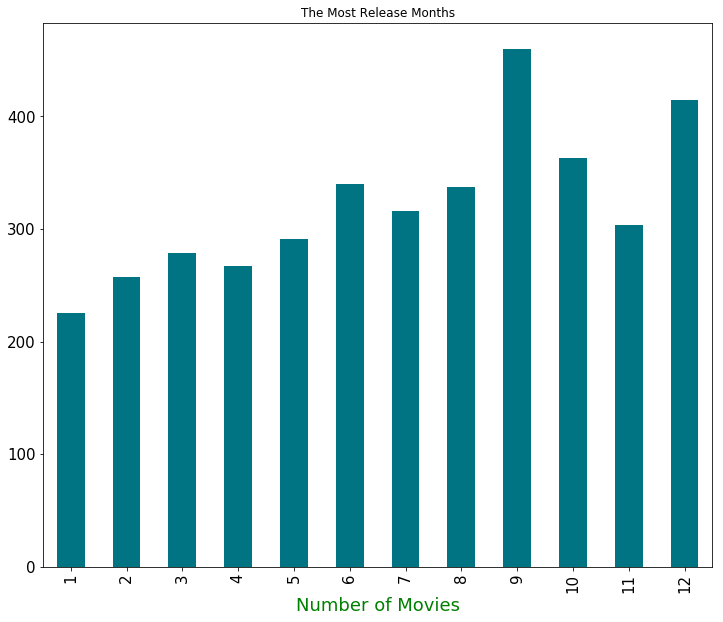

In [58]:
#We use the get_count method to retrieve the count of each month. 
month_count = get_count_of('month')

month_count = month_count.sort_index(ascending=True)

#initializing plot
axis = month_count.plot.bar(color = '#007482', fontsize = 15)

#giving a title
axis.set(title = 'The Most Release Months')

#x-label
axis.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
axis.figure.set_size_inches(12, 10)

#showing the plot
plt.show()





As per the data given, we could see that there are less amount of movies released during the month of January and max number of movies are released during September. Some of the reasons for less releases during the month of Jan could be that the Academy awards and Golden globe awards will be during those months. https://en.wikipedia.org/wiki/Dump_months

## Movies that had decent ratings collected profit at the box office than  low ratings

In order to proceed with the analysis of the question we have chosen, we need to create a profit column that will hold the values of the information of the profit information calculated as a difference between budget and revenue. 

In [59]:
def calculate_profit(data):
    """
    This methods calculates the profit and applies to each row.
    """
    return data['revenue'] - data['budget']

In [60]:
#Creating a clean new data frame to avoid alteration of the tmdb_data dataset.
data_with_profit = pd.DataFrame(tmdb_data)

#creates a new column profit based on the apply method.
data_with_profit['profit']= data_with_profit.apply(calculate_profit, axis=1)

#Check the head to have a look at the data and newly created a column.
data_with_profit.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1316249360


We can have look of some stats of what data we will working with.

In [61]:
data_with_profit.groupby('vote_average')['profit'].describe()



,count,mean,std,min,25%,50%,75%,max
vote_average,,,,,,,,
2.2,1.0,-6.492629e+07,NaN,-64926294.0,-6.492629e+07,-64926294.0,-6.492629e+07,-6.492629e+07
3.3,3.0,-1.252685e+07,7.881477e+06,-21097985.0,-1.599435e+07,-10890716.0,-8.241288e+06,-5.591861e+06
3.4,2.0,3.684187e+07,4.245991e+07,6818181.0,2.183003e+07,36841872.5,5.185372e+07,6.686556e+07
3.5,3.0,-7.307935e+06,2.143489e+06,-9557192.0,-8.317513e+06,-7077834.0,-6.183307e+06,-5.288780e+06
3.6,2.0,1.668139e+07,2.449222e+07,-637228.0,8.022079e+06,16681386.0,2.534069e+07,3.400000e+07
3.7,2.0,7.022091e+06,3.091318e+07,-14836831.0,-3.907370e+06,7022091.0,1.795155e+07,2.888101e+07
3.8,7.0,-6.029859e+06,2.257847e+07,-46733791.0,-1.248709e+07,100000.0,2.474113e+06,2.445074e+07
3.9,8.0,7.586951e+06,2.210866e+07,-19814759.0,-5.444454e+06,-1707043.5,2.316975e+07,4.616310e+07
4.0,7.0,-1.477917e+07,3.859067e+07,-69590483.0,-3.171357e+07,-21155093.0,-1.964134e+06,5.464683e+07


To have a clean understanding of the code,  two new dataframes are created that will hold the data related to the decent ratings any thing that is greater or equal to 7 and low rated which are less than 7 as the rating average. Also the levene's test is performed to determine the homogeneity of variance. The Levene's test ( Levene 1960) is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.

In [62]:
decent_ratings = data_with_profit[data_with_profit['vote_average'] >= 7]
low_ratings = data_with_profit[data_with_profit['vote_average'] < 7]
stats.levene(decent_ratings['profit'], low_ratings['profit'])

LeveneResult(statistic=140.1217067110923, pvalue=8.844614523592454e-32)

From the above result we conclude that the variance is not equal, which means we are assured to do the Null hypothesis.

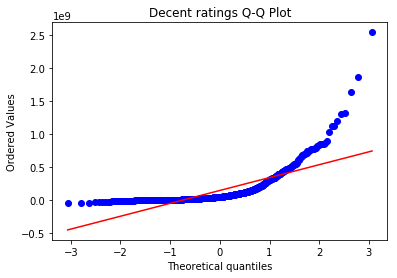

In [63]:
#Ploting the q-qplot for the decent ratings
stats.probplot(decent_ratings['profit'], dist="norm", plot= plt)
plt.title("Decent ratings Q-Q Plot")
plt.savefig("decent_ratings.png")

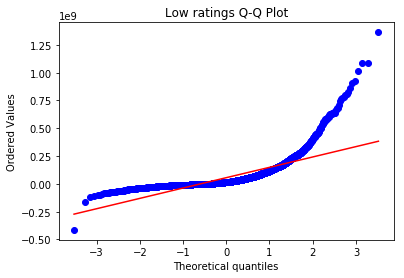

In [64]:
#Ploting the q-q plot for the low ratings
stats.probplot(low_ratings['profit'], dist="norm", plot= plt)
plt.title("Low ratings Q-Q Plot")
plt.savefig("low_ratings.png")

From the above qqplots we can deduce that the data contains some extreme values and we must eliminate them. This process will be done in the next steps. 

In [65]:
def remove_outliers(data):
    """
    This method helps to eliminate extreme values and normalize 
    """
    mean = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    final_list = [x for x in data if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    return final_list


600


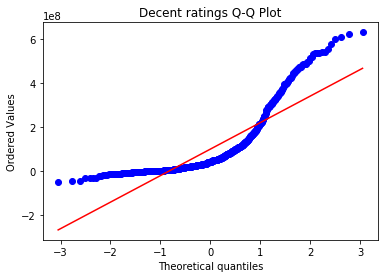

In [72]:
#Ploting the q-qplot for the decent ratings once again to check if the elimination of the outliers has any impact. 
#and it seems like moving towards the nomal distribution
stats.probplot(remove_outliers(decent_ratings['profit']), dist="norm", plot= plt)
plt.title("Decent ratings Q-Q Plot")
plt.savefig("decent_ratings.png")

3089


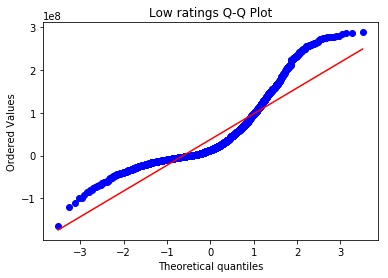

In [73]:
#Ploting the q-qplot for the decent ratings once again to check if the elimination of the outliers has any impact. 
#and it seems like moving towards the nomal distribution
stats.probplot(remove_outliers(low_ratings['profit']), dist="norm", plot= plt)
plt.title("Low ratings Q-Q Plot")
plt.savefig("low_ratings.png")

 The plot show that the distribution seems like moving towards the nomal distribution. We can also check how the histogram looks before and after for both decent ratings and low rated movies. 

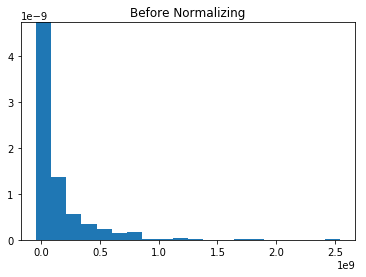

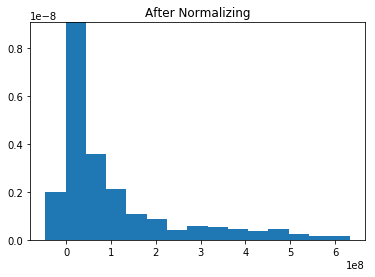

In [68]:
plt.title('Before Normalizing')
plt.hist(decent_ratings['profit'], density=True , bins = 20)
plt.show()
plt.title('After Normalizing')
plt.hist(remove_outliers(decent_ratings['profit']), density=True , bins = 15)
plt.show()


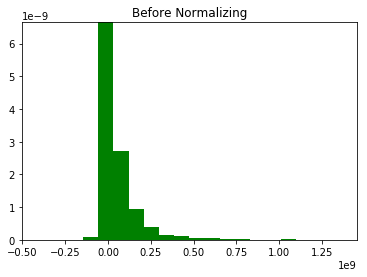

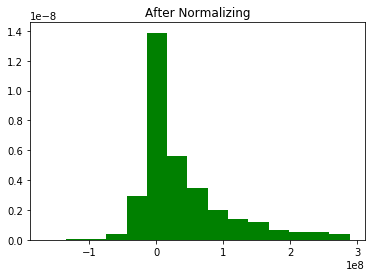

In [69]:
plt.title('Before Normalizing')
plt.hist(low_ratings['profit'], density=True , bins = 20, color='green')
plt.show()
plt.title('After Normalizing')
plt.hist(remove_outliers(low_ratings['profit']), density=True , bins = 15,color='green')
plt.show()

In [70]:
stats.ttest_ind(remove_outliers(decent_ratings['profit']), remove_outliers(low_ratings['profit']))

Ttest_indResult(statistic=17.249058391533648, pvalue=3.526068238214439e-64)

The Independent t-test results are significant! Therefore, one can reject the null hypothesis in support of the alternative.

# Conclusion

As a summary, the TMDb data is extremely interesting to explore and has lot more to be explored. But as a exercise, I tried to explore two major questions I had.

1. Does the month play a key role in the releases?
The answer would be, it could be possible that the Dump months according to hollywood is true but we cannot assure that the notion is not a myth completely unless we do some stastical analyses.
2. Does the average ratings affect the profit of the movies?
As per our Independent T-tests, the p-value is far less that 0.0001 which means there is a significant difference and this can help us to reject the null- hypothesis that the "Movies with decent ratings did not collect more profit than movies with low ratings in the box office".

# References

1. http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%207%20-%20Cleaning%20up%20messy%20data.ipynb
2. https://en.wikipedia.org/wiki/Dump_months
3. https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm
4. http://data.library.virginia.edu/understanding-q-q-plots/